In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
books = pd.read_csv('BX-Books.csv',sep=';',error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN','bookTitle','bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL']
users = pd.read_csv('BX-Users.csv',sep=';',error_bad_lines=False, encoding="latin-1")
users.columns = ['userID','Location','Age']
ratings = pd.read_csv('BX-Book-Ratings.csv',sep=';',error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID','ISBN','bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\shalm\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

In [3]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(ratings.shape)
print(list(ratings.columns))

(1149780, 3)
['userID', 'ISBN', 'bookRating']


In [5]:
users.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


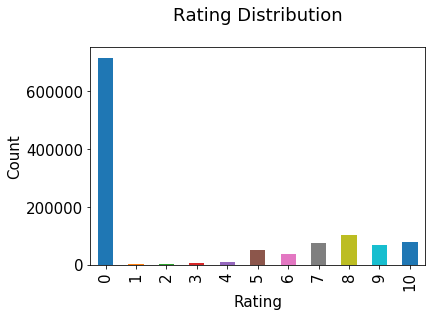

In [7]:
plt.rc("font",size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
#statistical filtering
#books which has <200 users excluded
#books which have <100 rating excluded
c1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(c1[c1>=200].index)]
c2 = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(c2[c2>=100].index)]
ratings.shape

(527556, 3)

In [11]:
#combining rating dataset with book dataset on ISBN field
combine_book_rating = pd.merge(ratings, books, on='ISBN')
combine_book_rating = combine_book_rating.drop(['bookAuthor','yearOfPublication','publisher','imageUrlS','imageUrlM','imageUrlL'], axis=1)
print(combine_book_rating.shape)
combine_book_rating.head()

(488742, 4)


,userID,ISBN,bookRating,bookTitle
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


In [12]:
combine_book_rating = combine_book_rating.dropna(axis=0, subset = ['bookTitle'])
book_ratingCount = (combine_book_rating.groupby(by=['bookTitle'])['bookRating'].count().reset_index().rename(columns = { 'bookRating':'totalRatingCount'})[['bookTitle','totalRatingCount']])
book_ratingCount.head()

,bookTitle,totalRatingCount
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [13]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left' )
rating_with_totalRatingCount.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [15]:
#giving some popularity thresold to discard less popular books
popularity_thresold = 50
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_thresold')
rating_popular_book.head()

,userID,ISBN,bookRating,bookTitle,totalRatingCount
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82


In [16]:
rating_popular_book.shape


(62149, 5)

In [17]:
##toomany records..

In [18]:
users.head(10)

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [19]:
#lets take only books which has users of usa and canada
combined = rating_popular_book.merge(users,left_on='userID',right_on='userID',how='left')
us_canada_user_rating = combined[combined['Location'].str.contains("usa|canada")]
us_canada_user_rating = us_canada_user_rating.drop('Age',axis=1)
us_canada_user_rating.head()


,userID,ISBN,bookRating,bookTitle,totalRatingCount,Location
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"gilbert, arizona, usa"
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"knoxville, tennessee, usa"
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,82,"byron, minnesota, usa"
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"cordova, tennessee, usa"
5,16795,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,82,"mechanicsville, maryland, usa"


In [20]:
us_canada_user_rating.shape

(56396, 6)

In [28]:
#knn implementation
#initial requirements satisfying
from scipy.sparse import csr_matrix
us_canada_user_rating = us_canada_user_rating.drop_duplicates(['userID','bookTitle'])
us_canada_user_rating_pivot = us_canada_user_rating.pivot(index='bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)
us_canada_user_rating_pivot.head()

userID,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,271448,271705,273979,274061,274308,274808,275970,277427,277639,278418
bookTitle,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0


In [29]:
'''plt.rc("font",size=15)
us_canada_user_rating_pivot.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()'''
#%matplotlib inline
#us_canada_user_rating_pivot.plot.bar()
#plt.show()

'plt.rc("font",size=15)\nus_canada_user_rating_pivot.bookRating.value_counts(sort=False).plot(kind=\'bar\')\nplt.title(\'Rating Distribution\n\')\nplt.xlabel(\'Rating\')\nplt.ylabel(\'Count\')\nplt.show()'

In [30]:
#implementing knn
from sklearn.neighbors import NearestNeighbors
model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)


NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=1, n_neighbors=5, p=2, radius=1.0)

In [41]:
us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1)

NameError: name 'query_index' is not defined

In [40]:
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
print(query_index)
a=us_canada_user_rating_pivot.iloc[query_index,:]
print(us_canada_user_rating_pivot.iloc[query_index,:])
print(a.shape)
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index,:].values.reshape(1,-1), n_neighbors=6)
print(distances)
print(indices)

419
userID
254        0.0
2276       0.0
2766       0.0
2977       0.0
3363       0.0
4017       0.0
4385       0.0
6242       0.0
6251       0.0
6323       0.0
6543       0.0
6563       0.0
6575       0.0
7158       0.0
7286       0.0
7346       0.0
7915       0.0
8067       0.0
8245       0.0
8681       0.0
8936       0.0
9856       0.0
10447      0.0
10819      0.0
11601      0.0
11993      0.0
12538      0.0
12824      0.0
13082      0.0
13273      0.0
          ... 
265115     0.0
265313     0.0
265889     0.0
266056     0.0
266226     0.0
266753     0.0
266865     0.0
267635     0.0
268032     0.0
268110     0.0
268330     0.0
268622     0.0
268932     0.0
269566     0.0
269719     0.0
269890     0.0
270713     0.0
270820     0.0
271195     0.0
271284     0.0
271448     0.0
271705     0.0
273979     0.0
274061    10.0
274308     0.0
274808     0.0
275970     0.0
277427     0.0
277639     0.0
278418     0.0
Name: Riptide, Length: 734, dtype: float64
(734,)
[[0.         0.63458013 

In [37]:
us_canada_user_rating_pivot.index[query_index]

"She's Come Undone (Oprah's Book Club)"

In [38]:
for i in range(0, len(distances.flatten())):
    if i==0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i,us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for She's Come Undone (Oprah's Book Club):

1: White Oleander : A Novel, with distance of 0.7861883068785991:
2: Animal Farm, with distance of 0.7982816034577993:
3: We Were the Mulvaneys, with distance of 0.8005485057109902:
4: Icy Sparks, with distance of 0.8084215910118722:
5: Mother of Pearl, with distance of 0.8184872440559342:


In [1]:
## lesser the distance more the similarity